# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Lecture 4, Exercise 2: EDA and Advanced PANDAS


**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

---

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## **NOTE**: After running every cell, be sure to auto-grade your work by clicking 'Mark' in the lower-right corner. Otherwise, no credit will be given.

## Advanced PANDAS

We will use the same `top50.csv` file from Exercise 1.

Below, fill in the blank to create a new PANDAS DataFrame from the `top50.csv` file.

In [2]:
### edTest(test_a) ###
df = _____

Run the cell below to print the summary statistics and display the column names

In [3]:
print(df.columns)
df.describe()

Fill in the blank to set `longest_song` equal to the `TrackName` of the longest song (the song that has the highest `Length` value)

In [4]:
### edTest(test_b) ###
longest_song = __________
longest_song

Fill in the blank to set `loud_song` equal to the `TrackName` of the song that has the highest `Loudness` value amongst the 10 most popular songs. To be clear, by highest we mean the least negative. So, we would say that -2 is louder than -10.

In [5]:
### edTest(test_c) ###
loud_song = _______________
loud_song

Say you are interested in songs that last 3-4 minutes, anything shorter doesn't have time to build up a narrative, and anything longer gets boring. You have a very particular taste but are open to listening to what other people are listening to a lot, but you don't even know what genre that is!

Fill in the blank below (or use multiple lines if you prefer) to set `new_genre` to be the genre that is associated with the most songs that are between 3 and 4 minutes in duration (including songs that are exactly 3 minutes and 4 minutes).

In [6]:
### edTest(test_d) ###
new_genre = ____________________
new_genre

Below, fill in the blank to make a new DataFrame `genre_counts` that groups all songs by their Genre and aggregates all other columns by their **median value**. Then, sort by their `Popularity` (in ascending order).

As an example, if `df` had only 3 "pop" songs, and their `Danceability` values were 70,82, and 90, and `df` also contained 5 "latin" songs, and their `Danceability` values were 80,82,90,91,99. Then `genre_counts` would have 1 row for the Genre "pop", with a Danceability value of 82. `genre_counts` would also have 1 row for the Genre "latin", with a Danceability value of 90. Then, we'd sort the DataFrame by the `Popularity` (in ascending order).

For example, your DataFrame should look as follows (snippet):
<img src="https://github.com/Harvard-IACS/2020-CS109A/blob/master/content/lectures/lecture04/images/sorted_pandas.png?raw=true">

In [7]:
### edTest(test_e) ###
new_df = _______________
new_df

Below, fill in the blank to set the variable `speechy_song` to the `TrackName` of the song that has the highest `Speechiness` value

In [8]:
### edTest(test_f) ###
speechy_song = _______________
speechy_song

# END OF GRADED SECTION

# EXTRA EXAMPLES FOLLOW:

### Combining multiple DataFrames

As mentioned, often times one dataset doesn't contain all of the information you are interested in -- in which case, you need to combine data from multiple files. This also means you need to verify the accuracy (per above) of each dataset.

``spotify_aux.csv`` contains the same 50 songs as ``top50.csv``; however, it only contains 3 columns:
- Track Name
- Artist Name
- Explicit Language (boolean valued)

Note, that 3rd column is just random Boolean values, but pretend as if it's correct. The point of this section is to demonstrate how to merge columns together.

Let's load ``spotify_aux.csv`` into a DataFrame:

In [9]:
explicit_lyrics = pd.read_csv("spotify_aux.csv")
explicit_lyrics

Let's merge it with our ``df`` DataFrame that is storing `top50.csv`.

``.merge()`` is a Pandas function that stitches together DataFrames by their columns.

``.concat()`` is a Pandas function that stitches together DataFrames by their rows (if you pass axis=1 as a flag, it will be column-based)

In [10]:
# 'on='' specifies the column used as the shared key
df_combined = pd.merge(explicit_lyrics, df, on='TrackName')
df_combined

We see that all columns from both DataFrames have been added. That's nice, but having duplicate ArtistName and TrackName is unecessary. Since ``merge()`` uses DataFrames as the passed-in objects, we can simply pass merge() a stripped-down copy of _ExplicitLanguage_, which helps merge() not add any redundant fields. 

In [11]:
df_combined2 = pd.merge(explicit_lyrics[['TrackName', 'ExplicitLanguage']], df, on='TrackName')
df_combined2

You'll notice we don't have the same number of rows as our original `df` DataFrame.

**Why is that? What happened? How can we quickly identify which rows are missing -- especially if our dataset had thousands of rows. Discuss with your group.**

Related to merge, are the useful functions:
- ``concat()``
- ``aggregate()``
- ``append()``

### Plotting DataFrames
As a very simple example of how one can plot elements of a DataFrame, we turn to Pandas' built-in plotting:

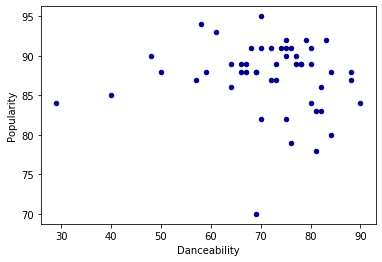

In [12]:
scatter_plot = df.plot.scatter(x='Danceability', y='Popularity', c='DarkBlue')
scatter_plot

This shows the lack of a correlation between the Danceability of a song and its popularity, based on just the top 50 songs, of course.

Please feel free to experiment with plotting other items of interest.

Print the songs that are faster than the average Top 50 and more popular than the average Top 50?

In [13]:
avg_speed = df['BeatsPerMinute'].mean()
avg_popularity = df['Popularity'].mean()
df[(df['BeatsPerMinute'] > avg_speed) & (df['Popularity'] > avg_popularity)]